## Reto 2: Matriz de correlaciones

### 1. Objetivos:
    - Aprender a generar e interpretar una matriz de correlaciones
 
---
    
### 2. Desarrollo:

In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Para este Reto vamos a utilizar un conjunto de datos llamado 'wine_quality_red-clean.csv'. Este dataset tiene datos acerca de diversos tipos de vino rojo. Incluye datos acerca de la composición química de los vinos y una variable 'quality' que es una evaluación de la calidad del vino que va del 1 al 10.

Aquí esta [el link](https://archive.ics.uci.edu/ml/datasets/wine+quality) de donde proviene este dataset.

In [11]:
df_wine = pd.read_csv('https://github.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020/raw/master/Datasets/wine_quality_red-clean.csv', index_col=0)

In [4]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed_acidity         1599 non-null   float64
 2   volatile_acidity      1599 non-null   float64
 3   citric_acid           1599 non-null   float64
 4   residual_sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free_sulfur_dioxide   1599 non-null   float64
 7   total_sulfur_dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [12]:
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df_wine.describe()

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,799.000000,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,461.735855,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,0.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,399.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,799.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1198.500000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1598.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df_wine.duplicated().sum()

0

In [13]:
df_wine['quality'] = df_wine['quality'].astype('category')
print(df_wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         1599 non-null   float64 
 1   volatile_acidity      1599 non-null   float64 
 2   citric_acid           1599 non-null   float64 
 3   residual_sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free_sulfur_dioxide   1599 non-null   float64 
 6   total_sulfur_dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   category
dtypes: category(1), float64(11)
memory usage: 151.7 KB
None


In [14]:
wine_numeric = df_wine.select_dtypes(include=['float64', 'int64'])
wine_categorical = df_wine.select_dtypes(include=['category', 'object'])

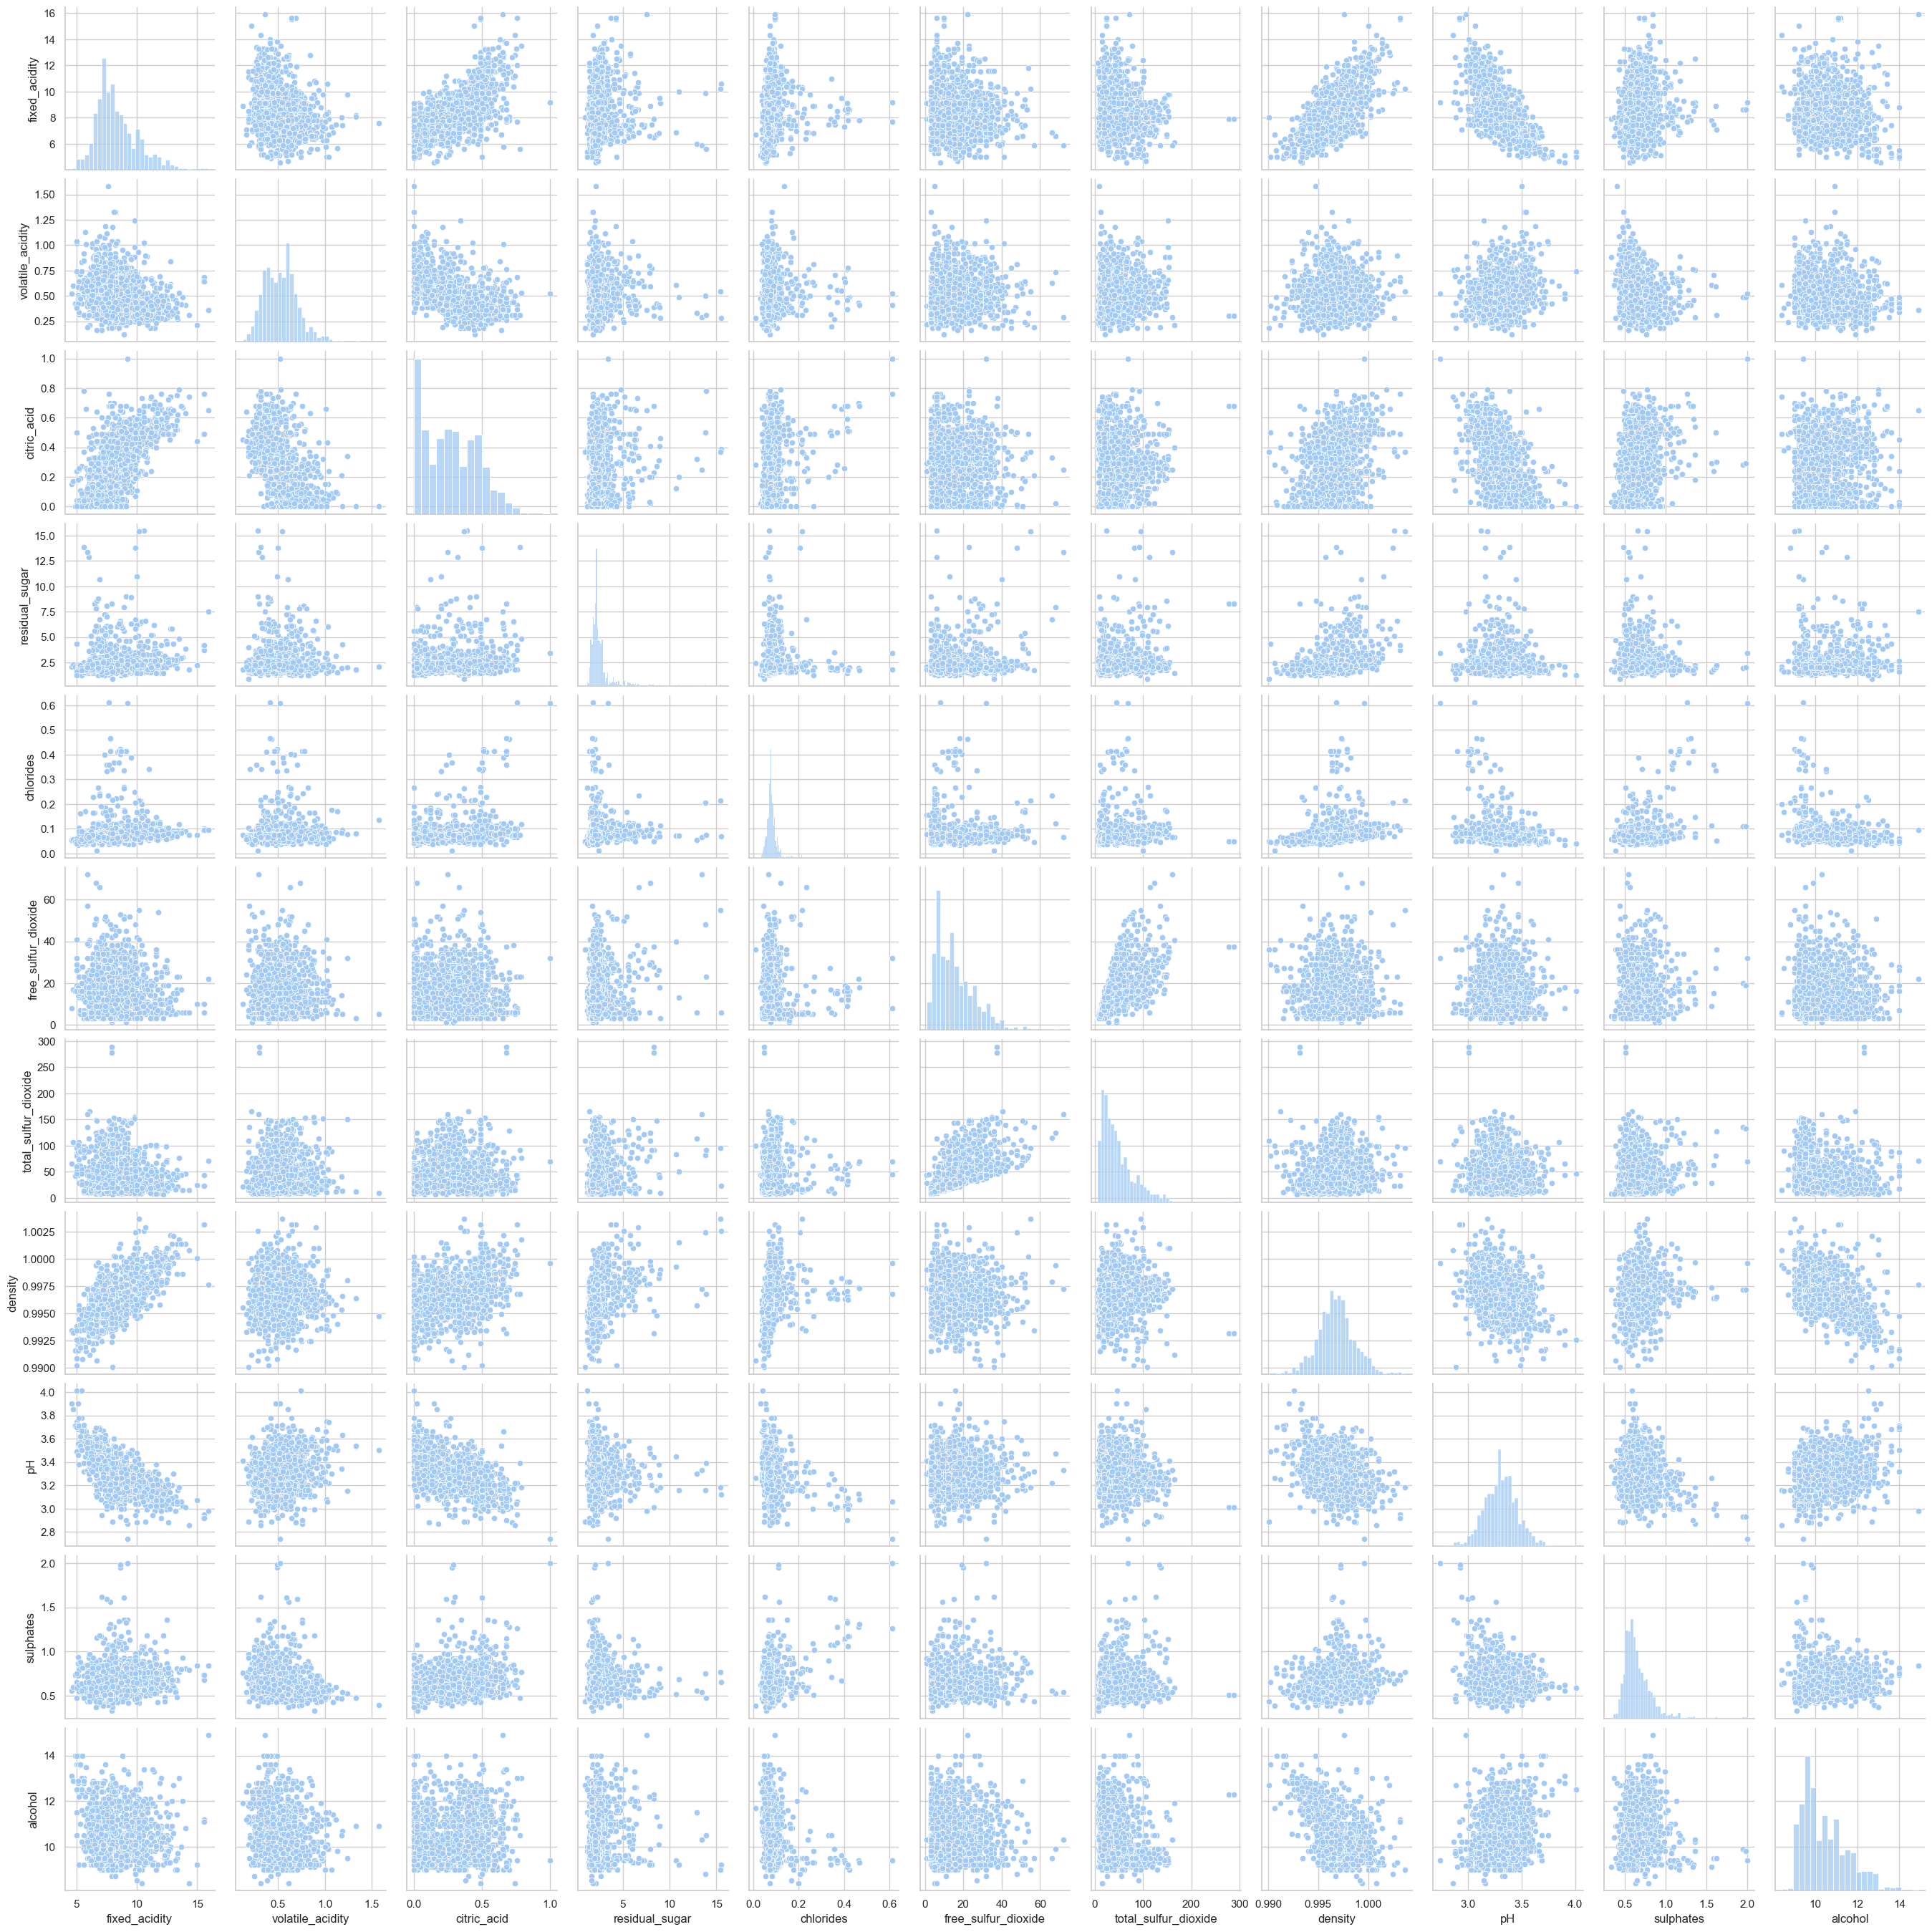

In [23]:
sns.set(style="whitegrid", palette="pastel")
sns.pairplot(wine_numeric)


<Figure size 1000x600 with 0 Axes>

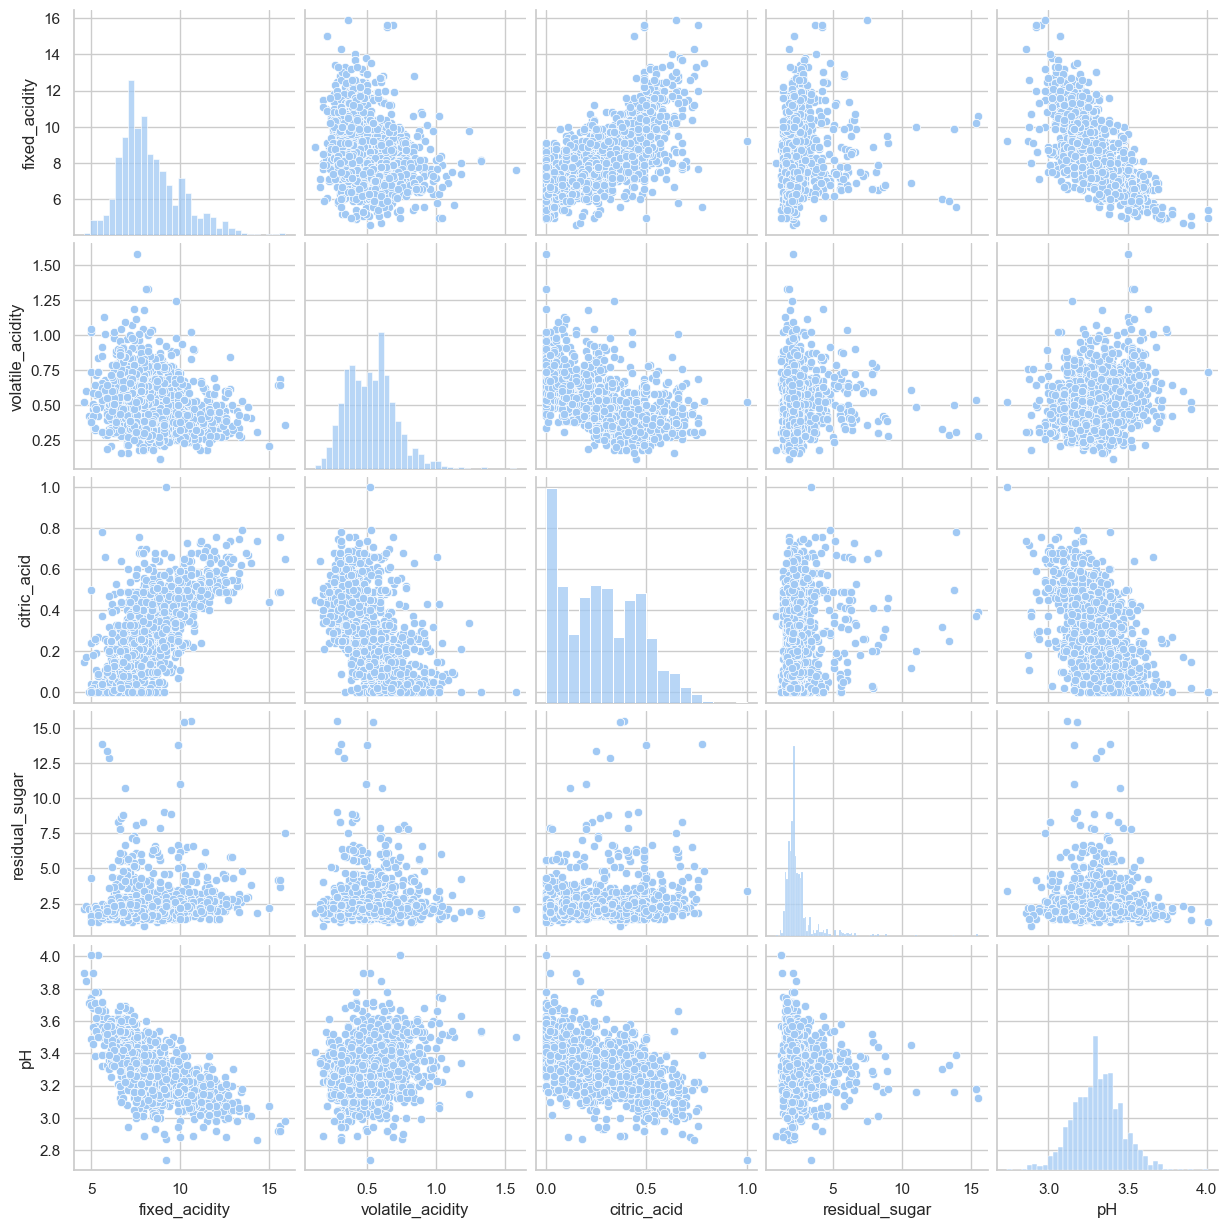

In [20]:
group1 = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'pH']
group2 = ['chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'sulphates', 'alcohol']

plt.figure(figsize=(10, 6))
sns.pairplot(wine_numeric[group1])
plt.show()

<Figure size 1000x600 with 0 Axes>

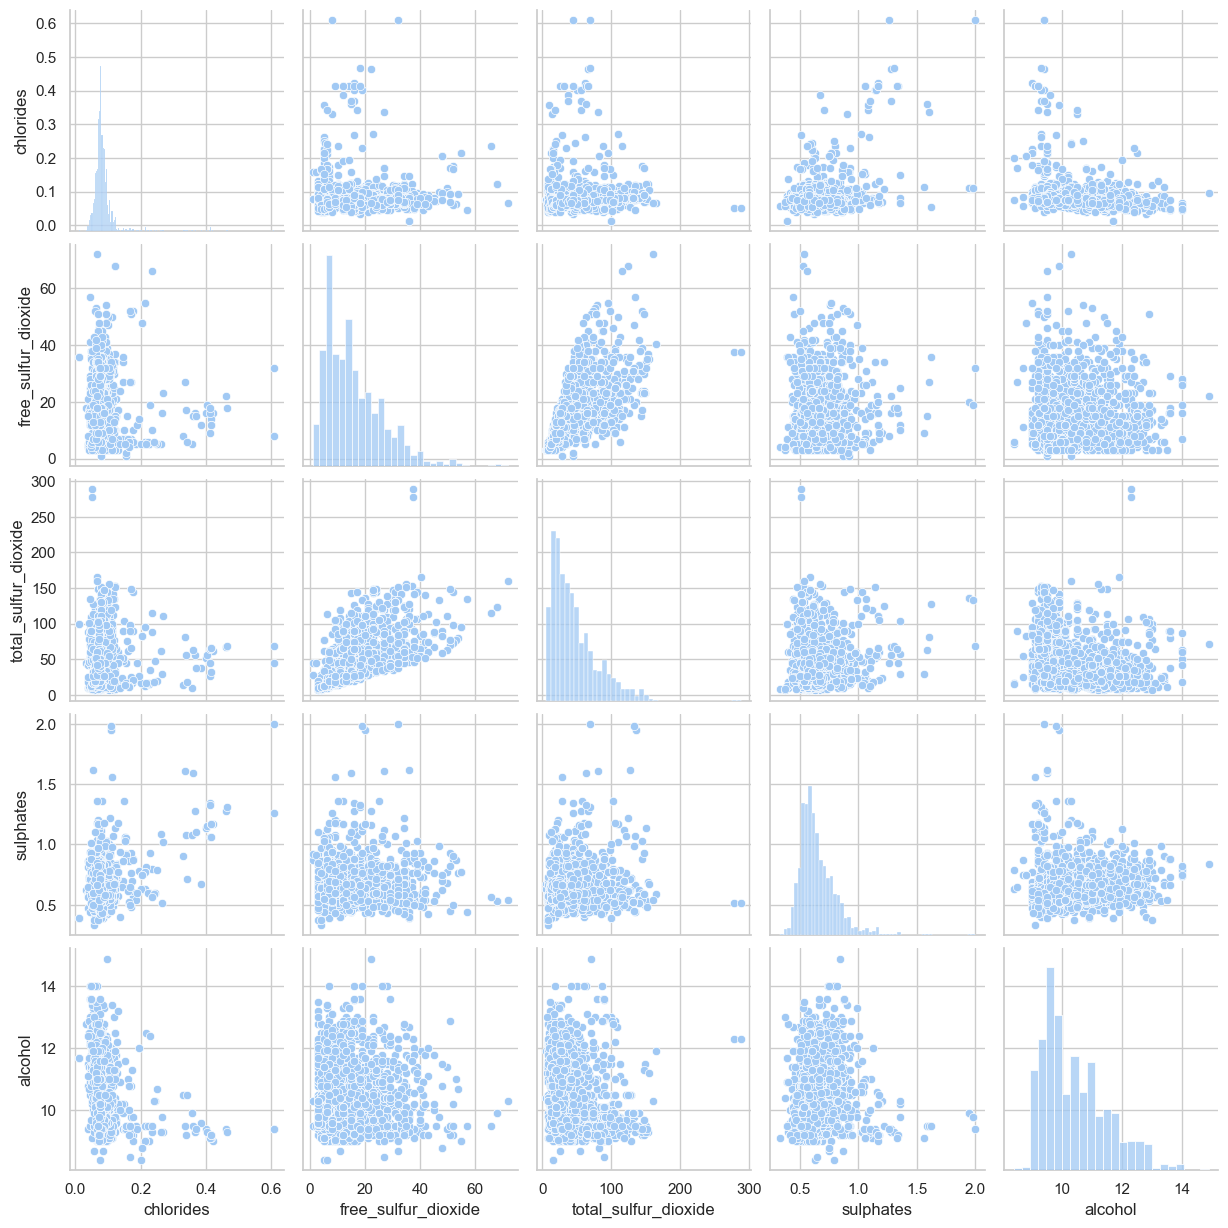

In [21]:
plt.figure(figsize=(10, 6))
sns.pairplot(wine_numeric[group2])
plt.show()

Vamos a explorar las relaciones que existen entre estas variables. Para esto, genera un heatmap para visualizar el coeficiente de correlación de Pearson entre todas las variables del dataset. Añade un título y utiliza [la documentación](https://seaborn.pydata.org/generated/seaborn.heatmap.html) para modificar la gráfica a tu gusto y hacerla más atractiva y comprensible. Puedes modificar el grosor de las líneas entre los cuadros, el color de los cuadros, el rango total del espectro de colores, etc. Después de tener lista tu visualización, responde las siguientes preguntas y coméntalas con tus compañeros y la experta:

1. ¿Qué variables no tienen una correlación lineal entre ellas?
2. ¿Qué variables tienen correlaciones positivas?
3. ¿Qué par de variables tiene la mayor correlación positiva?
4. ¿Qué variables tienen correlaciones negativas?
5. ¿Qué par de variables tiene la mayor correlación negativa?
6. ¿Tienes algunas hipótesis acerca de por qué existen estas correlaciones (o porque no existen)?

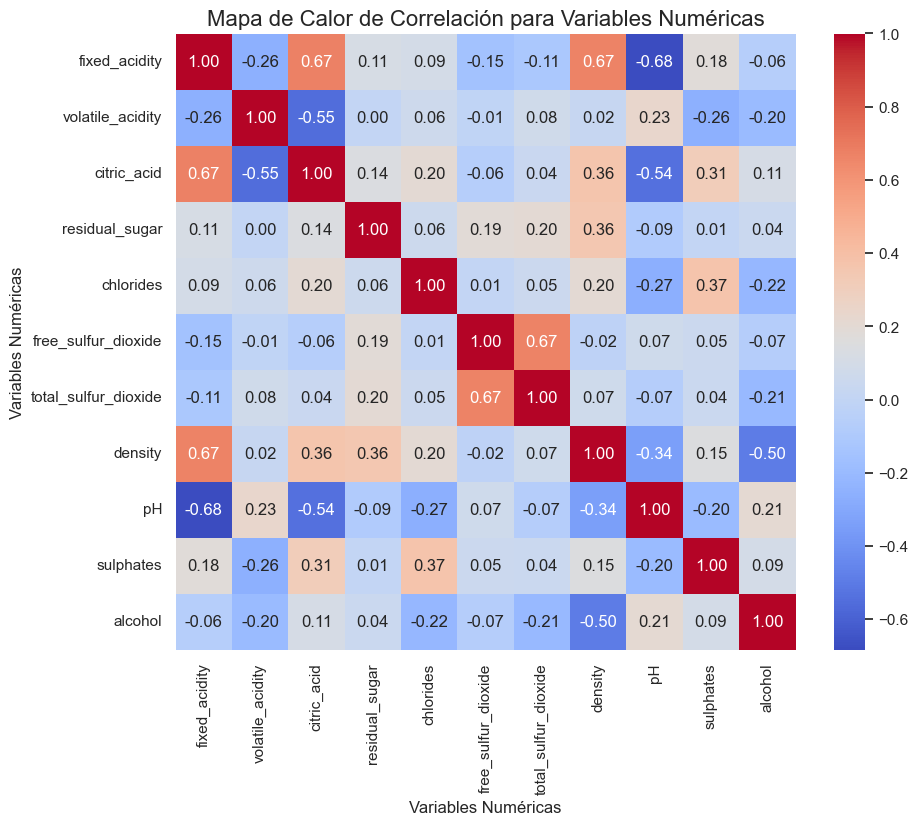

In [25]:
corr_matrix = wine_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de Calor de Correlación para Variables Numéricas", fontsize=16)
plt.xlabel("Variables Numéricas")
plt.ylabel("Variables Numéricas")
plt.show()

1. **¿Qué variables no tienen una correlación lineal entre ellas?**
   - Las variables que no tienen una correlación lineal entre ellas son aquellas cuya correlación está cerca de 0. Esto indica una falta de relación lineal entre las variables. En este caso, **residual_sugar**, **free_sulfur_dioxide**, y **total_sulfur_dioxide** tienen correlaciones cercanas a 0 con respecto a otras variables.

2. **¿Qué variables tienen correlaciones positivas?**
   - Las variables que tienen correlaciones positivas incluyen **fixed_acidity** y **citric_acid**, **fixed_acidity** y **density**, **citric_acid** y **density**, **citric_acid** y **sulphates**, **residual_sugar** y **density**, **chlorides** y **sulphates**, y algunas otras.

3. **¿Qué par de variables tiene la mayor correlación positiva?**
   - El par de variables con la mayor correlación positiva en esta matriz es **total_sulfur_dioxide** y **free_sulfur_dioxide**, con una correlación de 0.667666.

4. **¿Qué variables tienen correlaciones negativas?**
   - Las variables que tienen correlaciones negativas incluyen **fixed_acidity** y **pH**, **fixed_acidity** y **alcohol**, **volatile_acidity** y **citric_acid**, **volatile_acidity** y **pH**, **volatile_acidity** y **sulphates**, y algunas otras.

5. **¿Qué par de variables tiene la mayor correlación negativa?**
   - El par de variables con la mayor correlación negativa en esta matriz es **fixed_acidity** y **pH**, con una correlación de -0.682978.

6. **¿Tienes algunas hipótesis acerca de por qué existen estas correlaciones (o porque no existen)?**
   - Las correlaciones positivas pueden deberse a relaciones químicas o físicas entre las variables. Por ejemplo, la correlación positiva entre **fixed_acidity** y **citric_acid** podría deberse a que los ácidos cítricos son una fuente de acidez en los vinos. Las correlaciones negativas podrían deberse a efectos de compensación, donde un aumento en una variable conlleva a una disminución en otra. Por ejemplo, la correlación negativa entre **fixed_acidity** y **pH** podría indicar que a medida que aumenta la acidez fija, el pH tiende a disminuir.

Recuerda que la correlación no implica causalidad, por lo que estas observaciones son correlaciones estadísticas y no necesariamente relaciones de causa y efecto.
